In [1]:
# data science imports
import pandas as pd
import matplotlib.pyplot as plt

# census data imports
import censusdis.data as ced
import censusdis.maps as cem

# other imports
import os

In [2]:
with open("../census_api_key.txt", "r") as f:
    CENSUS_API_KEY = f.read().strip()

# print(CENSUS_API_KEY)

In [3]:
# get a straight population count for all counties in MN
pop = ced.download(
    dataset="acs/acs5",
    vintage=2023,
    download_variables=["NAME", "B25003_001E"],
    state="27",
    county="*",
    with_geometry=True,
    api_key=CENSUS_API_KEY,
)


pop.head()

,STATE,COUNTY,NAME,B25003_001E,geometry
0,27,001,"Aitkin County, Minnesota",6935,"POLYGON ((-93.81217 46.50435, -93.81139 46.515..."
1,27,003,"Anoka County, Minnesota",136171,"POLYGON ((-93.51251 45.25179, -93.51183 45.276..."
2,27,005,"Becker County, Minnesota",14404,"POLYGON ((-96.19467 47.15115, -96.10971 47.151..."
3,27,007,"Beltrami County, Minnesota",17908,"POLYGON ((-95.60171 48.45212, -95.60183 48.459..."
4,27,009,"Benton County, Minnesota",16494,"POLYGON ((-94.35295 45.82202, -94.3252 45.8223..."


In [4]:
# when you download data with geometry, you get a geopandas dataframe
type(pop)

geopandas.geodataframe.GeoDataFrame

<Axes: >

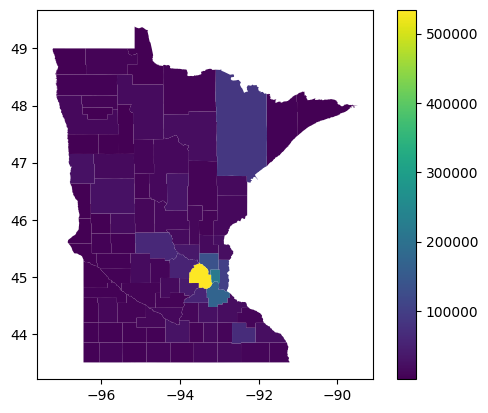

In [5]:
# .plot is all you need to make a quick map
pop.plot(
    # set a column to make a choropleth
    column="B25003_001E",
    legend=True,
)

In [6]:
pop[ pop["NAME"].str.contains("Hennepin") ]

,STATE,COUNTY,NAME,B25003_001E,geometry
26,27,053,"Hennepin County, Minnesota",534573,"POLYGON ((-93.76804 44.90544, -93.76794 44.912..."


In [7]:
# a more interesting map might be by tract
tract_pop = ced.download(
    dataset="acs/acs5",
    vintage=2023,
    download_variables=["NAME", "B25003_001E"],
    state="27",
    county= "053",
    tract= "*",
    with_geometry=True,
    api_key=CENSUS_API_KEY,
)


tract_pop.head()

,STATE,COUNTY,TRACT,NAME,B25003_001E,geometry
0,27,053,000101,Census Tract 1.01; Hennepin County; Minnesota,1127,"POLYGON ((-93.3195 45.05125, -93.31419 45.0512..."
1,27,053,000102,Census Tract 1.02; Hennepin County; Minnesota,1860,"POLYGON ((-93.29919 45.05114, -93.29409 45.051..."
2,27,053,000300,Census Tract 3; Hennepin County; Minnesota,1273,"POLYGON ((-93.31879 45.03546, -93.30856 45.035..."
3,27,053,000601,Census Tract 6.01; Hennepin County; Minnesota,1909,"POLYGON ((-93.26411 45.0276, -93.26238 45.0276..."
4,27,053,000603,Census Tract 6.03; Hennepin County; Minnesota,1375,"POLYGON ((-93.23712 45.02406, -93.23711 45.027..."


<Axes: >

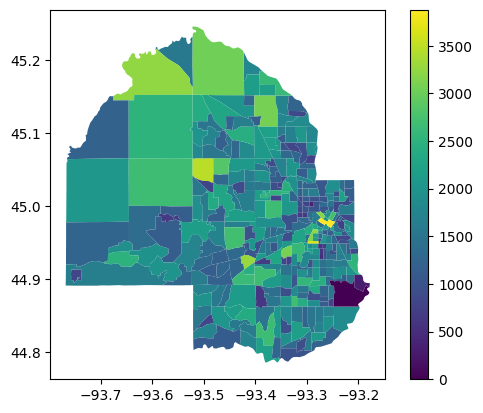

In [8]:
# visualizing all tracts
tract_pop.plot(
    column = "B25003_001E",
    legend = True
)

# Note that this is not likely to be very insightful on its own becuse physical tract size varies a lot

In [9]:
# the explore method is a quick way to make an interactive map
tract_pop.explore(
    column="B25003_001E",
    legend=True,
    alpha=0.5,
)

---
---
---